This is my first major project focused on data cleaning, specifically analyzing airplane crashes from 1908 to 2009. I concentrated on crashes by terrain, both land and water, categorizing each terrain by its sub-terrain and listing all causes of the accidents. Additionally, I have shared a world map, a United States map, and an ocean map. Any code developed with the help of ChatGPT is mentioned. If you have any questions, feel free to ask. If you enjoyed the project, please give it a thumbs up, as it would be greatly appreciated.

In [267]:
# for numerical operations
import numpy as np

# for data manipulation and analysis
import pandas as pd

# for regular expressions
import re

# for graph purposes
import matplotlib.pyplot as plt

# for natural language processing tasks, including tokenization and n-grams
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# counts the frequency of elements in a list or iterable.
from collections import Counter

# used for text parsing, named entity recognition, and part-of-speech tagging
!pip install spacy
!python -m spacy download en_core_web_md
import spacy

# load SpaCy model
nlp = spacy.load("en_core_web_md")

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 29.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# Import File

In [269]:
# upload file
airplane = pd.read_csv("/kaggle/input/airplane-crashes-since-1908/Airplane_Crashes_and_Fatalities_Since_1908.csv")

# General Info

In [270]:
# reset index
# new column "id" and equal to the "index"
airplane.reset_index(drop=False, inplace=True)
airplane.rename(columns={'index': 'id'}, inplace=True)

In [271]:
# rename columns
airplane.columns = ["id","date", "time","location","operator","flight_no","route","type","registration","cn_in","aboard","fatalities","ground","summary"]

In [272]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5268 non-null   int64  
 1   date          5268 non-null   object 
 2   time          3049 non-null   object 
 3   location      5248 non-null   object 
 4   operator      5250 non-null   object 
 5   flight_no     1069 non-null   object 
 6   route         3561 non-null   object 
 7   type          5241 non-null   object 
 8   registration  4933 non-null   object 
 9   cn_in         4040 non-null   object 
 10  aboard        5246 non-null   float64
 11  fatalities    5256 non-null   float64
 12  ground        5246 non-null   float64
 13  summary       4878 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 576.3+ KB


In [273]:
airplane.sample()

,id,date,time,location,operator,flight_no,route,type,registration,cn_in,aboard,fatalities,ground,summary
2529,2529,02/16/1972,02:55,"Jackson, Mississippi",Hankins Airways - Air Taxi,NaN,"Chicago, IL - Detroit, MI",Beechcraft D 18S,N80398,NaN,2.0,2.0,0.0,The aircraft failed to maintain flying speed a...


# Drop Columns

In [274]:
# drop "flight_no"
airplane = airplane.drop("flight_no", axis='columns')

# drop "registration"
airplane = airplane.drop("registration", axis='columns')

# drop "cn_in"
airplane = airplane.drop("cn_in", axis='columns')

In [275]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5268 non-null   int64  
 1   date        5268 non-null   object 
 2   time        3049 non-null   object 
 3   location    5248 non-null   object 
 4   operator    5250 non-null   object 
 5   route       3561 non-null   object 
 6   type        5241 non-null   object 
 7   aboard      5246 non-null   float64
 8   fatalities  5256 non-null   float64
 9   ground      5246 non-null   float64
 10  summary     4878 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 452.8+ KB


In [276]:
airplane.sample()

,id,date,time,location,operator,route,type,aboard,fatalities,ground,summary
4566,4566,07/17/1998,04:15,"Asmara, Eritrea",Ukraine Aviation Transport Company,"Bourgas, Bulgaria - Asmara, Eritrea",Ilyushin II-76,10.0,10.0,0.0,"While on an ILS approach, the cargo plane stru..."


# Date

In [277]:
# define "date"
date = airplane[["id","date"]]

In [278]:
# convert "date" column to dtype <datetime>
date['date'] = pd.to_datetime(date['date'])

# extract the day of week
date["day_of_week"] = date["date"].dt.day_name()

# extract the day
date['day'] = date['date'].dt.day

# extract the month
date['month'] = date['date'].dt.strftime('%B')

# extract the year
date['year'] = date['date'].dt.year


/tmp/ipykernel_33/2114796863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date['date'] = pd.to_datetime(date['date'])
/tmp/ipykernel_33/2114796863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date["day_of_week"] = date["date"].dt.day_name()
/tmp/ipykernel_33/2114796863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [279]:
date.sample()

,id,date,day_of_week,day,month,year
3513,3513,1984-10-28,Sunday,28,October,1984


# Time

In [280]:
# define "time"
time = airplane[["id","time"]]

# "time" that contains [A-Z][a-z] and special characters, except for ":"
time[time["time"].str.contains(r'[a-zA-Z!@#$%^&*(),.?"{}|<>]', na=False)]

,id,time
190,190,c: 1:00
213,213,c:17:00
228,228,c: 2:00
279,279,c:09:00
1462,1462,c16:50
1949,1949,18.40
2599,2599,c:09:00
3390,3390,c14:30
4838,4838,c: 9:40


In [281]:
# 190
time.iloc[190,1] = "01:00"
# 213
time.iloc[213,1] = "17:00"
# 228
time.iloc[228,1] = "02:00"
# 279
time.iloc[279,1] = "09:00"
# 1462
time.iloc[1462,1] = "16:50"
# 1949
time.iloc[1949,1] = "18:40"
# 2599
time.iloc[2599,1] = "09:00"
# 3390
time.iloc[3390,1] = "14:30"
# 4838
time.iloc[4838,1] = "09:40"

In [282]:
# "time" that contains a single quote
time[time["time"].str.contains(r"[']", na=False)]

,id,time
1710,1710,12'20
4829,4829,22'08


In [283]:
# 1710
time.iloc[1710,1] = "12:20"
# 4829
time.iloc[4829,1] = "22:08"

In [284]:
# "time" that does not follow the <datetime> format %H:%M [0:2][0:3]-[0:5][0:9]
time.query("time in '114:20'")

,id,time
3267,3267,114:20


In [285]:
# 3267
time.iloc[3267,1] = "14:20"

In [286]:
# "time" that does not follow the <datetime> format %H:%M [0:2][0:3]-[0:5][0:9]
time.query("time in '0943'")

,id,time
3536,3536,0943


In [287]:
# 3536
time.iloc[3536,1] = "09:43"

In [288]:
# convert time to <datetime>
time['time'] = pd.to_datetime(time['time'])

# extract the hour
time['hour'] = time['time'].dt.hour

# any missing values has a placeholder of "-1"
time["hour"] = time["time"].dt.hour.fillna(-1).astype(int)

# extract the minute
time['minute'] = time['time'].dt.minute

# any missing values has a placeholder of "-1"
time["minute"] = time["time"].dt.minute.fillna(-1).astype(int)

/tmp/ipykernel_33/159161649.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time['time'] = pd.to_datetime(time['time'])
/tmp/ipykernel_33/159161649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['time'] = pd.to_datetime(time['time'])
/tmp/ipykernel_33/159161649.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['hour'] = time['time'].dt.hour
/tmp/ipy

In [289]:
# am_pm function
def am_pm(hour):
    # if hour = "nan", replace it with a placeholder "-1"
    if hour == -1:
      return np.nan
    # if hour is less than 12, return "am"
    elif hour < 12:
        return "AM"
    # if hour is greater than 12, return "pm"
    elif hour >= 12:
        return "PM"
    else:
        return np.nan

# apply the am_pm function
time['am_pm'] = time['hour'].apply(am_pm)

/tmp/ipykernel_33/3637914468.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['am_pm'] = time['hour'].apply(am_pm)


In [290]:
# categorize hours function
def categorize_hour(hour):
    # if time is between 0 to 5, return "midnight"
    if 0 <= hour < 5:
        return 'Midnight'
    # if time is between 5 to 8, return "early morning"
    elif 5 <= hour < 8:
        return 'Early Morning'
    # if time is between 8 to 12, return "morning"
    elif 8 <= hour < 12:
        return 'Morning'
    # if time is between 12 to 17, return "afternoon"
    elif 12 <= hour < 17:
        return 'Afternoon'
    # if tme is between 17 to 20, return "evening"
    elif 17 <= hour < 20:
        return 'Evening'
    # if time is between 20 to 23, return "night"
    elif 20 <= hour <= 23:
        return 'Night'
    else:
        return np.nan

# apply the categorize hours function
time['categorize_time'] = time['hour'].apply(categorize_hour)

/tmp/ipykernel_33/1850874244.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['categorize_time'] = time['hour'].apply(categorize_hour)


In [291]:
time.sample()

,id,time,hour,minute,am_pm,categorize_time
106,106,NaT,-1,-1,NaN,NaN


# Merged Dataset 1

In [292]:
# merging two datasets
airplane_merge_1 = pd.merge(date,time,how="right",on="id")

In [293]:
# drop "date"
airplane_merge_1 = airplane_merge_1.drop("date", axis='columns')

# drop "time"
airplane_merge_1 = airplane_merge_1.drop("time", axis='columns')

In [294]:
airplane_merge_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5268 non-null   int64 
 1   day_of_week      5268 non-null   object
 2   day              5268 non-null   int32 
 3   month            5268 non-null   object
 4   year             5268 non-null   int32 
 5   hour             5268 non-null   int64 
 6   minute           5268 non-null   int64 
 7   am_pm            3049 non-null   object
 8   categorize_time  3049 non-null   object
dtypes: int32(2), int64(3), object(4)
memory usage: 329.4+ KB


In [295]:
airplane_merge_1.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time
2634,2634,Thursday,22,February,1973,19,0,PM,Evening


# Location

In [296]:
# define "location"
location = airplane[["id","location"]]

In [297]:
# list for all countries names [generated by chatgpt]
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
    'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
    'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
    'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
    'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
    'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Democratic Republic of the Congo',
    'Republic of the Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
    'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor (Timor-Leste)', 'Ecuador',
    'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
    'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
    'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
    'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
    'North Korea', 'South Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
    'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
    'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands',
    'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia',
    'Montenegro', 'Morocco', 'Mozambique', 'Myanmar (Burma)', 'Namibia', 'Nauru', 'Nepal',
    'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
    'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay',
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda',
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
    'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
    'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria',
    'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago',
    'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates',
    'United Kingdom', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
    'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe', 'England', 'Bulgeria',
    'Wales', 'Ireland', 'Scotland', 'Northern Ireland', 'Soviet Union','Czechoslovakia','DemocratiRepubliof Congo',
    'DemocratiRepubliCongo','Burma','Congo','New Guinea','Boliva',' Puerto Rico','Puerto Rico','DR Congo','Yugoslavia',
    'Virgin Islands','South Vietnam','USSR','Guam','The Netherlands','Ivory Coast','Romainia','West Germany','Okinawa','Canary Islands',
    'Newfoundland','Trinidad','Comoro Islands','UK','French Polynesia','Cameroons','Hong Kong','Phillipines','Zaire','UAE','Greenland',
    'Morrocco','Antarctica','East Germany','Canada2','Myanmar','Thiland','U.S. Virgin Islands','French Equatorial Africa','Jamacia','Chechnya',
    'Baangladesh','Russian','Aregntina','Zaïre','Rhodesia','West Pakistan','Napal','American Samoa','United States'
]

In [298]:
# list for all us states [generated by chatgpt]
us_states = [
    ('Alabama', 'AL'), ('Alaska', 'AK'), ('Arizona', 'AZ'), ('Arkansas', 'AR'), ('California', 'CA'),
    ('Colorado', 'CO'), ('Connecticut', 'CT'), ('Delaware', 'DE'), ('Florida', 'FL'), ('Georgia', 'GA'),
    ('Hawaii', 'HI'), ('Idaho', 'ID'), ('Illinois', 'IL'), ('Indiana', 'IN'), ('Iowa', 'IA'),
    ('Kansas', 'KS'), ('Kentucky', 'KY'), ('Louisiana', 'LA'), ('Maine', 'ME'), ('Maryland', 'MD'),
    ('Massachusetts', 'MA'), ('Michigan', 'MI'), ('Minnesota', 'MN'), ('Mississippi', 'MS'),
    ('Missouri', 'MO'), ('Montana', 'MT'), ('Nebraska', 'NE'), ('Nevada', 'NV'), ('New Hampshire', 'NH'),
    ('New Jersey', 'NJ'), ('New Mexico', 'NM'), ('New York', 'NY'), ('North Carolina', 'NC'),
    ('North Dakota', 'ND'), ('Ohio', 'OH'), ('Oklahoma', 'OK'), ('Oregon', 'OR'), ('Pennsylvania', 'PA'),
    ('Rhode Island', 'RI'), ('South Carolina', 'SC'), ('South Dakota', 'SD'), ('Tennessee', 'TN'),
    ('Texas', 'TX'), ('Utah', 'UT'), ('Vermont', 'VT'), ('Virginia', 'VA'), ('Washington', 'WA'),
    ('West Virginia', 'WV'), ('Wisconsin', 'WI'), ('Wyoming', 'WY')
]

In [299]:
# dictionary for any incorrect country name 'incorrect':'correct'
# incorrect countries were extracted by myself, but manual corrections was made with chatgpt
corrections = {
        'DemocratiRepubliof Congo': 'Democratic Republic of the Congo',
        'DemocratiRepubliof Congo': 'Democratic Republic of the Congo',
        'DemocratiRepubliCongo':'Democratic Republic of the Congo',
        'DemocratiRepubliCongo':'Democratic Republic of the Congo',
        'DR Congo':'Democratic Republic of the Congo',
        'Congo' : 'Democratic Republic of the Congo',
        'Burma':'Myanmar (Burma)',
        'New Guinea':'Papua New Guinea',
        'Boliva':'Bolivia',
        'U.S. Virgin Islands':'U.S. Virgin Islands',
        'Virgin Islands':'U.S. Virgin Islands',
        'USSR':'Soviet Union',
        'The Netherlands':'Netherlands',
        'Romainia':'Romania',
        'Okinawa':'Japan',
        'Canary Islands':'Spain',
        'Newfoundland':'Canada',
        'Trinidad':'Trinidad and Tobago',
        'Comoro Islands':'Comoros Islands',
        'UK':'United Kingdom',
        'Cameroons':'Cameroon',
        'Phillipines':'Philippines',
        'Zaire':'Republic of Zaire',
        'UAE':'United Arab Emirates',
        'Morrocco':'Morocco',
        'Canada2':'Canada',
        'Myanmar':'Myanmar (Burma)',
        'Thiland':'Thailand',
        'Jamacia':'Jamaica',
        'Chechnya':'Russia',
        'Baangladesh':'Bangladesh',
        'Russian':'Russia',
        'Aregntina':'Argentina',
        'Zaïre':'Zaire',
        'West Pakistan':'Pakistan',
        'Napal':'Nepal'
}

# categorize location function 
# function generated by chatgpt
def categorize_location(location):
    # if location has a missing value, return "nan" for all three columns ["area","us_state","country"]
    if pd.isna(location):
        return np.nan, np.nan, np.nan
    # location are splitted based on a special character ","
    location_parts = location.split(',')
    us_state = None
    country = None
    for part in location_parts:
        part = part.strip()
        # for any incorrect country written, it is fixed under corrections dictionary (as shown above)
        corrected_part = corrections.get(part, part)
        # checking if location parts gets the same value as in countries list
        if corrected_part in countries:
            country = corrected_part
        # checking if us states gets the same value as in us state list either in their full name or abbreviation
        for state, abbreviation in us_states:
            if corrected_part == state or corrected_part == abbreviation:
                us_state = state
                country = 'United States'
                break
    return location_parts[0] if len(location_parts) > 0 else np.nan, us_state, country

# applying the function to create three new columns - "city","us_state", and "country"
location[['area', 'us_state', 'country']] = location['location'].apply(lambda x: pd.Series(categorize_location(x)))

/tmp/ipykernel_33/1497056280.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location[['area', 'us_state', 'country']] = location['location'].apply(lambda x: pd.Series(categorize_location(x)))
/tmp/ipykernel_33/1497056280.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  location[['area', 'us_state', 'country']] = location['location'].apply(lambda x: pd.Series(categorize_location(x)))
/tmp/ipykernel_33/1497056280.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [300]:
location.sample()

,id,location,area,us_state,country
1407,1407,"Jacksonville, Florida",Jacksonville,Florida,United States


# Merged Dataset 2

In [301]:
# merging two datasets
airplane_merge_2 = pd.merge(airplane_merge_1,location,how="right",on="id")

In [302]:
# drop "location"
airplane_merge_2 = airplane_merge_2.drop("location", axis='columns')

In [303]:
airplane_merge_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5268 non-null   int64 
 1   day_of_week      5268 non-null   object
 2   day              5268 non-null   int32 
 3   month            5268 non-null   object
 4   year             5268 non-null   int32 
 5   hour             5268 non-null   int64 
 6   minute           5268 non-null   int64 
 7   am_pm            3049 non-null   object
 8   categorize_time  3049 non-null   object
 9   area             5248 non-null   object
 10  us_state         1389 non-null   object
 11  country          4921 non-null   object
dtypes: int32(2), int64(3), object(7)
memory usage: 452.8+ KB


In [304]:
airplane_merge_2.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,us_state,country
2593,2593,Monday,2,October,1972,-1,-1,NaN,NaN,Kampot,None,Cambodia


# Cause

In [305]:
# define "context"
context = airplane[["id","location","summary"]]

In [306]:
# causes key words was extracted using n-grams (work got deleted after extracting necessary keys and values)
# causes were generated by chatgpt, but later improved by myself to gain more accurate results
causes = {
    "Mechanical Failure": ["exploded","electrical", "mechanical", "failure", "engine", "malfunction", "issues", "system", "equipment"],
    "Weather": ["weather", "conditions", "storm", "hail", "fog", "tornado", "hurricane", "blizzard", "rain", "wind", "ice", "snow", "lightning", "icing", "buildup", "frost", "poor", "visibility", "thunderstorm"],
    "Bomb": ["bomb", "explosion", "terrorist", "attack", "bombing", "IED", "improvised", "explosive", "device", "blast"],
    "Human Error": ["human", "error", "pilot", "driver", "operator", "negligence", "misjudgment", "mistake", "fatigue", "miscommunication"],
    "Collision": ["collision", "crash", "accident", "smash", "impact", "vehicle", "mid", "air", "ground", "crashed", "struck"],
    "Technical Malfunction": ["malfunction", "technical", "software", "glitch", "hardware", "system", "instrument", "navigation"],
    "Fuel Issues": ["fuel", "shortage", "exhaustion", "leak", "contamination", "running", "out"],
    "Fire": ["fire", "onboard", "engine", "cargo", "cabin", "leading", "burned", "flames"],
    "Runway Issues": ["runway", "incursion", "excursion", "overrun", "undershoot"],
    "Medical Emergency": ["medical", "emergency", "passenger", "illness", "crew", "pilot", "incapacitation", "health"],
    "Structural Failure": ["structural", "airframe", "wing", "tail", "fuselage", "collapse"],
    "Navigation Error": ["navigation", "wrong", "coordinates", "system", "gps", "altitude"],
    "Landing Gear Issues": ["landing", "gear", "failure", "malfunction", "collapse"],
    "Wildlife": ["wildlife", "animal", "runway", "strike", "collision"],
    "Disappearance": ["disappeared"]
}

In [307]:
# categorize causes function
# function generated by chatgpt
def categorize_cause(cause):
    if isinstance(cause, float):
        return None

    doc = nlp(cause.lower())  # all data extracting is from column "summary" and text will naturally be read in lower case
    cause_category = None
    max_count = 0

    # identify "cause" (case insensitive)
    for cause_label, keywords in causes.items():
        count = 0
        for token in doc:
            if token.lemma_.lower() in [keyword.lower() for keyword in keywords]:  # convert keyword to lowercase
                count += 1
        # if multiple keywords are shown within the same text
        # the key words mostly repeated within the cause values is chosen 
        # due to the diverse amount of information within one description
        if count > max_count:
            max_count = count
            cause_category = cause_label

    return cause_category

In [308]:
# apply function to dataframe
context[['cause']] = context['summary'].apply(lambda x: pd.Series(categorize_cause(x)))

/tmp/ipykernel_33/3156608251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  context[['cause']] = context['summary'].apply(lambda x: pd.Series(categorize_cause(x)))


In [309]:
context.sample()

,id,location,summary,cause
3561,3561,"Juara, Brazil",The plane stalled and crashed into an emergenc...,Collision


# Merged Dataset 3

In [310]:
# merging two datasets
airplane_merge_3 = pd.merge(airplane_merge_2,context,how="right",on="id")

In [311]:
# drop "summary"
airplane_merge_3 = airplane_merge_3.drop("summary", axis='columns')

In [312]:
airplane_merge_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5268 non-null   int64 
 1   day_of_week      5268 non-null   object
 2   day              5268 non-null   int32 
 3   month            5268 non-null   object
 4   year             5268 non-null   int32 
 5   hour             5268 non-null   int64 
 6   minute           5268 non-null   int64 
 7   am_pm            3049 non-null   object
 8   categorize_time  3049 non-null   object
 9   area             5248 non-null   object
 10  us_state         1389 non-null   object
 11  country          4921 non-null   object
 12  location         5248 non-null   object
 13  cause            4643 non-null   object
dtypes: int32(2), int64(3), object(9)
memory usage: 535.2+ KB


In [313]:
airplane_merge_3.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,us_state,country,location,cause
1176,1176,Monday,4,February,1952,-1,-1,NaN,NaN,Kikwit,None,None,"Kikwit, Belgian Congo",Mechanical Failure


# Operator

In [314]:
# define "operator"
operator = airplane[["id","operator"]]

In [315]:
# data cleaning function
# not written by chatgpt (but some advice was taken from it)
def data_cleaning(text):
    if pd.isna(text):  # check if the value is NaN
        return np.nan  # any NaN value is returned as NaN
    # remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return cleaned_text

# applying the function "data_cleaning"
operator["clean_operator"] = operator["operator"].apply(data_cleaning)

/tmp/ipykernel_33/14733957.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operator["clean_operator"] = operator["operator"].apply(data_cleaning)


In [316]:
# military keywords for category [used n-grams]
# initially generated by chatgpt, but modified by myself to gain more accurate results
military_keywords = [
    "u.s. air force", "usaf", "u.s. army air forces", "u.s. navy", "royal air force",
    "raf", "u.s. army", "military", "air force", "air forces", "navy"
]

# service keywords for category [used n-grams]
# initially generated by chatgpt, but modified by myself to gain more accurate results
service_keywords = [
    "dhl", "service", "cargo", "fedex", "postal service", "ups", "freight", "logistics",
    "tnt", "airborne express", "mail", "courier"
]

# private keywords for category [used n-grams]
# initially generated by chatgpt, but modified by myself to gain more accurate results
private_keywords = [
    "private", "air taxi", "taxi", "charter", "bizjet", "corporate jet",
    "personal aircraft", "general aviation", "executive jet"
]

In [317]:
# categorize aircraft function 
# not written by chatgpt (but some advice was taken from it)
def categorize_aircraft_type(operator):
    if pd.isna(operator): # if any "nan" values, return "nan"
        return np.nan
    operator = operator.lower()  # operator should not be case-sensitive

    # use the list written above, and observe if any key words match
    if any(keyword in operator for keyword in military_keywords):
        return "Military"
    elif any(keyword in operator for keyword in service_keywords):
        return "Service"
    elif any(keyword in operator for keyword in private_keywords):
        return "Private"
    else:
        return "Commercial"    # the default value is "commercial" due to the aviation industry being dominated by commercial during the start of the 1950s

# applying the function "categorize_aircraft_type"
operator["aircraft_category"] = operator["clean_operator"].apply(categorize_aircraft_type)

/tmp/ipykernel_33/2724616544.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operator["aircraft_category"] = operator["clean_operator"].apply(categorize_aircraft_type)


In [318]:
# for "aircraft_type" under the commercial category, the airline name will be printed
operator["airline_name"] = operator.apply(lambda row: row["operator"] if row["aircraft_category"] == "Commercial" else np.nan, axis=1)

/tmp/ipykernel_33/868595766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  operator["airline_name"] = operator.apply(lambda row: row["operator"] if row["aircraft_category"] == "Commercial" else np.nan, axis=1)


In [319]:
operator.sample()

,id,operator,clean_operator,aircraft_category,airline_name
5021,5021,Lion Air,lion air,Commercial,Lion Air


# Merged Dataset 4

In [320]:
# merging datasests
airplane_merge_4 = pd.merge(airplane_merge_3,operator,how="right",on="id")

In [321]:
# drop "clean_operator"
airplane_merge_4 = airplane_merge_4.drop("clean_operator", axis='columns')

In [322]:
airplane_merge_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5268 non-null   int64 
 1   day_of_week        5268 non-null   object
 2   day                5268 non-null   int32 
 3   month              5268 non-null   object
 4   year               5268 non-null   int32 
 5   hour               5268 non-null   int64 
 6   minute             5268 non-null   int64 
 7   am_pm              3049 non-null   object
 8   categorize_time    3049 non-null   object
 9   area               5248 non-null   object
 10  us_state           1389 non-null   object
 11  country            4921 non-null   object
 12  location           5248 non-null   object
 13  cause              4643 non-null   object
 14  operator           5250 non-null   object
 15  aircraft_category  5250 non-null   object
 16  airline_name       3643 non-null   object


In [323]:
airplane_merge_4.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,us_state,country,location,cause,operator,aircraft_category,airline_name
3542,3542,Friday,22,February,1985,-1,-1,NaN,NaN,Timbuktu,None,Mali,"Timbuktu, Mali",Mechanical Failure,Air Mali,Commercial,Air Mali


# Route

In [324]:
# define "route"
route = airplane[["id","route"]]

In [325]:
# seperate words function
# function generated by chatgpt
def separate_words(text):
    if pd.isna(text):  # handing "nan" values
        return [np.nan, np.nan, np.nan]
    parts = text.split("-")   # any "-" symbol is found is seperated into different columns
    # if any element that double "-", then it seperates strings into three seperate columns - "departure", "destination_1", and "destination_2"
    parts.extend([np.nan] * (3 - len(parts)))
    return parts[:3]

route[["departure", "destination_1", "destination_2"]] = pd.DataFrame(route["route"].apply(separate_words).tolist(), index=route.index)

/tmp/ipykernel_33/73673823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[["departure", "destination_1", "destination_2"]] = pd.DataFrame(route["route"].apply(separate_words).tolist(), index=route.index)
/tmp/ipykernel_33/73673823.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[["departure", "destination_1", "destination_2"]] = pd.DataFrame(route["route"].apply(separate_words).tolist(), index=route.index)
/tmp/ipykernel_33/73673823.py:11: SettingWithCopyWarning: 
A value is trying to 

In [326]:
route.sample()

,id,route,departure,destination_1,destination_2
3293,3293,"Muskegon, MI - Pontiac, MI","Muskegon, MI","Pontiac, MI",NaN


# Merged Dataset 5

In [327]:
# merging datasets
airplane_merge_5 = pd.merge(airplane_merge_4,route,how="right",on="id")

In [328]:
airplane_merge_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5268 non-null   int64 
 1   day_of_week        5268 non-null   object
 2   day                5268 non-null   int32 
 3   month              5268 non-null   object
 4   year               5268 non-null   int32 
 5   hour               5268 non-null   int64 
 6   minute             5268 non-null   int64 
 7   am_pm              3049 non-null   object
 8   categorize_time    3049 non-null   object
 9   area               5248 non-null   object
 10  us_state           1389 non-null   object
 11  country            4921 non-null   object
 12  location           5248 non-null   object
 13  cause              4643 non-null   object
 14  operator           5250 non-null   object
 15  aircraft_category  5250 non-null   object
 16  airline_name       3643 non-null   object


In [329]:
airplane_merge_5.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,country,location,cause,operator,aircraft_category,airline_name,route,departure,destination_1,destination_2
35,35,Monday,16,August,1920,-1,-1,NaN,NaN,College Park,...,United States,"College Park, Maryland",NaN,US Aerial Mail Service,Service,NaN,NaN,NaN,NaN,NaN


# Type

In [330]:
# define "type"
airplane_type = airplane[["id","type"]]

In [331]:
# function "data_cleaning"
# not generated by chatgpt
def data_cleaning(text):
    # removing all special characters except apostrophes
    text = re.sub("[^\w\s']", " ", text)
    # convert all text to lower case
    text = text.lower()
    # condense multiple spaces into one
    text = re.sub("\s+", " ", text)
    return text

In [332]:
# apply function "data_cleaning" and adding new column "clean_type"
airplane_type["clean_type"] = airplane_type["type"].astype(str).apply(data_cleaning)

/tmp/ipykernel_33/2731748179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_type["clean_type"] = airplane_type["type"].astype(str).apply(data_cleaning)


In [333]:
# airplane manufacturer names were extracted by using n-grams
# but later improved when data was given to chatgpt
airplane_manufacturers = [
    "aerospace lines", "airbus", "aircraft development", "aircraft manufacturing", "albatros",
    "anthony fokker", "antonov", "aviation industries", "bae", "bae systems", "bell", "bell aircraft",
    "bell helicopter", "beechcraft", "boeing", "bombardier", "british aerospace", "britten-norman",
    "bucker", "canadian vickers", "caproni", "cessna", "consolidated", "convair", "curtiss",
    "curtiss-wright", "dassault", "de havilland", "diamond", "dornier", "douglas", "dc", "fairchild",
    "fokker", "gulfstream", "handley page", "hawker", "hawker beechcraft", "hawker siddeley",
    "hiller", "hughes", "ilia", "ilyushin", "jacobs", "junkers", "kawasaki", "kawanishi", "lancair",
    "larc", "learjet", "letov", "lockheed", "lockheed martin", "mcdonnell", "mcdonnell douglas",
    "mikoyan", "mitsubishi", "mooney", "nakajima", "north american", "northrop", "northrop grumman",
    "panavia", "piper", "republic", "rockwell", "ryan", "saab", "savoia-marchetti", "sikorsky",
    "socata", "sukhoi", "supermarine", "tupolev", "vickers", "westland", "wiener neustädter flugzeugwerke",
    "yakovlev", "bristol","shaanxi","breguet","embraer","casa","let","mil","martin","avro","britten","swearingen",
    "nord","latecoere","grumman","shorts","beech","dewoitine","ford","stinson","short","lisunov","pitcairn",
    "sncase","iai","mi","focke","cams","farman","travel","harbin yunshuji","namc","Liore","canadair","fiat","DHC"
]

airplane_manufacturers_set = set(airplane_manufacturers)

In [334]:
# function identify_manufacturer_and_type
# inititally generated by chatgpt, but later modified by myself to gain more accurate results
def identify_manufacturer_and_type(row):
    if pd.isnull(row):
        return np.nan, np.nan       # any nan values is returned as nan

    # special handling for any aircraft type related to mcdonnell douglas
    if any(x in row.lower() for x in ["dc", "mcdonnell", "douglas"]):
        type_info = row.lower().replace("dc", "").replace("mcdonnell", "").replace("douglas", "").strip().title()
        return "McDonnell Douglas", type_info

    for manufacturer in airplane_manufacturers_set:
        if manufacturer in row.lower():
            type_info = row.lower().replace(manufacturer, "").strip().title()
            return manufacturer.title(), type_info

    return np.nan, np.nan

In [335]:
airplane_type[['manufacturer', 'type_info']] = airplane_type['type'].apply(lambda x: pd.Series(identify_manufacturer_and_type(x)))

/tmp/ipykernel_33/2810945388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_type[['manufacturer', 'type_info']] = airplane_type['type'].apply(lambda x: pd.Series(identify_manufacturer_and_type(x)))
/tmp/ipykernel_33/2810945388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airplane_type[['manufacturer', 'type_info']] = airplane_type['type'].apply(lambda x: pd.Series(identify_manufacturer_and_type(x)))


In [336]:
airplane_type.sample()

,id,type,clean_type,manufacturer,type_info
251,251,Heinkel HE-2,heinkel he 2,NaN,NaN


# Merged Dataset 6

In [337]:
# merging datasets
airplane_merge_6 = pd.merge(airplane_merge_5,airplane_type,how="right",on="id")

In [338]:
airplane_merge_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5268 non-null   int64 
 1   day_of_week        5268 non-null   object
 2   day                5268 non-null   int32 
 3   month              5268 non-null   object
 4   year               5268 non-null   int32 
 5   hour               5268 non-null   int64 
 6   minute             5268 non-null   int64 
 7   am_pm              3049 non-null   object
 8   categorize_time    3049 non-null   object
 9   area               5248 non-null   object
 10  us_state           1389 non-null   object
 11  country            4921 non-null   object
 12  location           5248 non-null   object
 13  cause              4643 non-null   object
 14  operator           5250 non-null   object
 15  aircraft_category  5250 non-null   object
 16  airline_name       3643 non-null   object


In [339]:
airplane_merge_6.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,aircraft_category,airline_name,route,departure,destination_1,destination_2,type,clean_type,manufacturer,type_info
3569,3569,Monday,12,August,1985,-1,-1,NaN,NaN,Mulia,...,Commercial,Merpati Nusantara Airlines,NaN,NaN,NaN,NaN,de Havilland Canada DHC-6 Twin Otter 300,de havilland canada dhc 6 twin otter 300,De Havilland,Canada Dhc-6 Twin Otter 300


# Stats (Aboard, Fatalities, Ground)

In [340]:
# define "stats" - that contains "aboard", "fatalities", and "ground"
stats = airplane[["id","aboard","fatalities","ground"]]

In [341]:
# columns with missing values
missing_stats = stats[stats['fatalities'].notna() & (stats['aboard'].isna() | stats['ground'].isna())]

In [342]:
missing_stats

,id,aboard,fatalities,ground
228,228,3.0,3.0,NaN
308,308,9.0,4.0,NaN
310,310,8.0,8.0,NaN
348,348,NaN,3.0,0.0
526,526,NaN,1.0,0.0
527,527,2.0,2.0,NaN
587,587,NaN,4.0,0.0
643,643,21.0,21.0,NaN
832,832,NaN,87.0,4.0
1177,1177,17.0,17.0,NaN


In [343]:
# "aboard" column
# aboard = fatalities - ground
stats.iloc[348,1] = 3
stats.iloc[526,1] = 1
stats.iloc[587,1] = 4
stats.iloc[832,1] = 87
stats.iloc[1479,1] = 1
stats.iloc[3007,1] = 1
stats.iloc[3323,1] = 12
stats.iloc[3369,1] = 1
stats.iloc[3843,1] = 10
stats.iloc[4080,1] = 1

# "ground" colum
# ground = aboard - fatalities
stats.iloc[228,3] = 0
stats.iloc[308,3] = 0
stats.iloc[310,3] = 0
stats.iloc[527,3] = 0
stats.iloc[643,3] = 0
stats.iloc[1177,3] = 0
stats.iloc[1186,3] = 0
stats.iloc[1822,3] = 0
stats.iloc[4709,3] = 0
stats.iloc[5264,3] = 0

In [344]:
# adding new column "survival"
stats["survival"] = stats["aboard"] - stats["fatalities"]

/tmp/ipykernel_33/51946232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats["survival"] = stats["aboard"] - stats["fatalities"]


In [345]:
stats.sample()

,id,aboard,fatalities,ground,survival
4434,4434,3.0,1.0,0.0,2.0


# Merged Dataset 7

In [346]:
# merging datasets
airplane_merge_7 = pd.merge(airplane_merge_6,stats,how="right",on="id")

In [347]:
airplane_merge_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5268 non-null   int64  
 1   day_of_week        5268 non-null   object 
 2   day                5268 non-null   int32  
 3   month              5268 non-null   object 
 4   year               5268 non-null   int32  
 5   hour               5268 non-null   int64  
 6   minute             5268 non-null   int64  
 7   am_pm              3049 non-null   object 
 8   categorize_time    3049 non-null   object 
 9   area               5248 non-null   object 
 10  us_state           1389 non-null   object 
 11  country            4921 non-null   object 
 12  location           5248 non-null   object 
 13  cause              4643 non-null   object 
 14  operator           5250 non-null   object 
 15  aircraft_category  5250 non-null   object 
 16  airline_name       3643 

In [348]:
airplane_merge_7.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,destination_1,destination_2,type,clean_type,manufacturer,type_info,aboard,fatalities,ground,survival
4442,4442,Wednesday,2,October,1996,1,16,AM,Midnight,Off Pasamayo,...,Santiago,NaN,Boeing B-757-200,boeing b 757 200,Boeing,B-757-200,70.0,70.0,0.0,0.0


# Terrain

In [349]:
# define "terrain"
terrain = airplane[["id","location","summary"]]

In [350]:
# data cleaning function
# function created by myself, not chatgpt
def data_cleaning(text):
    if pd.isna(text):  # check if the value is NaN and return NaN as default
        return np.nan
    # remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return cleaned_text

# applying the function "data_cleaning"
terrain["clean_location"] = terrain["location"].apply(data_cleaning)
terrain["clean_summary"] = terrain["summary"].apply(data_cleaning)

/tmp/ipykernel_33/232841634.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrain["clean_location"] = terrain["location"].apply(data_cleaning)
/tmp/ipykernel_33/232841634.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrain["clean_summary"] = terrain["summary"].apply(data_cleaning)


In [351]:
# terrain-related keywords
# all keywords were initially generated to chatgpt to gain a good initial start
# but later modified by myself to gain more accurate results
land_keywords = [
    "mountain", "hill", "valley", "forest", "desert", "plain", "plateau", "canyon", "cliff", "gorge",
    "tundra", "savannah", "prairie", "steppe", "grassland", "runway", "airfield", "airport", "road",
    "highway", "street", "field", "farm", "farmland", "park", "urban", "suburban", "rural", "wilderness",
    "trail", "path", "campsite", "bridge", "tunnel", "railway", "rail", "track", "yard"
]

water_keywords = [
    "river", "lake", "bay", "ocean", "sea", "pond", "stream", "creek", "lagoon", "estuary", "gulf", "canal",
    "reservoir", "fjord", "strait", "harbor", "marina", "wetland", "brook", "delta", "water", "flooding",
    "submerged", "underwater", "drown", "capsized", "sinking", "splashdown", "maritime", "aquaplaning",
    "nautical", "vessel", "ship", "boat", "seaplane", "marine", "offshore", "inshore", "pier", "dock", "quay",
    "buoy", "lighthouse", "jetty", "anchorage", "reef", "tidal", "wave", "current","pacifiocean","atlantiocean",
    "channel","coast","atlantic","pacific"
]

In [352]:
# categorize terrain function
# function was initially started by myself, but later improved by chatgpt
def categorize_terrain(row):
    def check_terrain(text):
        if pd.isnull(text):
            return "Unknown"
        doc = nlp(text)
        for token in doc:
            if token.text.lower() in land_keywords:
                return "Land"
            if token.text.lower() in water_keywords:
                return "Water"
        return "Unknown"
  
    summary_terrain = check_terrain(row['clean_summary'])    
    location_terrain = check_terrain(row['clean_location'])  # the reason i added location as part of the search, because it has keywords related to ocean crashes

    if summary_terrain != "Unknown":
        return summary_terrain
    elif location_terrain != "Unknown":
        return location_terrain
    else:
        return "Land"     # "land" is the default value, if no terrain has been identified from location and summary columns

In [353]:
# applying the extract_terrain function to the "Clean_summary" column
terrain["terrain"] = terrain.apply(categorize_terrain, axis=1)

/tmp/ipykernel_33/4022390871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrain["terrain"] = terrain.apply(categorize_terrain, axis=1)


In [354]:
terrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5268 non-null   int64 
 1   location        5248 non-null   object
 2   summary         4878 non-null   object
 3   clean_location  5248 non-null   object
 4   clean_summary   4878 non-null   object
 5   terrain         5268 non-null   object
dtypes: int64(1), object(5)
memory usage: 247.1+ KB


In [355]:
terrain.sample()

,id,location,summary,clean_location,clean_summary,terrain
5138,5138,"Princeville, Hawaii",The helicopter crashed on Kauai shortly after ...,princeville hawaii,the helicopter crashed on kauai shortly after ...,Land


# Merged Dataset 8

In [356]:
# merging datasets
airplane_merge_8 = pd.merge(airplane_merge_7,terrain,how="right",on="id")

In [357]:
# drop location_x
airplane_merge_8 = airplane_merge_8.drop("location_x", axis='columns')

# drop location_y
airplane_merge_8 = airplane_merge_8.drop("location_y", axis='columns')

# drop clean_location
airplane_merge_8 = airplane_merge_8.drop("clean_location", axis='columns')

# drop clean_summary
airplane_merge_8 = airplane_merge_8.drop("clean_summary", axis='columns')

In [358]:
airplane_merge_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5268 non-null   int64  
 1   day_of_week        5268 non-null   object 
 2   day                5268 non-null   int32  
 3   month              5268 non-null   object 
 4   year               5268 non-null   int32  
 5   hour               5268 non-null   int64  
 6   minute             5268 non-null   int64  
 7   am_pm              3049 non-null   object 
 8   categorize_time    3049 non-null   object 
 9   area               5248 non-null   object 
 10  us_state           1389 non-null   object 
 11  country            4921 non-null   object 
 12  cause              4643 non-null   object 
 13  operator           5250 non-null   object 
 14  aircraft_category  5250 non-null   object 
 15  airline_name       3643 non-null   object 
 16  route              3561 

In [359]:
airplane_merge_8.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,type,clean_type,manufacturer,type_info,aboard,fatalities,ground,survival,summary,terrain
84,84,Sunday,8,June,1924,-1,-1,NaN,NaN,Barranquilla,...,Junkers F-13,junkers f 13,Junkers,F-13,3.0,3.0,0.0,0.0,NaN,Land


# Sub-Terrain for Land

In [360]:
# define "land"
land = airplane[["id","location","summary"]]

In [361]:
# sub-terrain for land was initially generated by chatgpt
# but later improved by myself by using n-grams to gain more accurate results
lands = {
    "Mountain": ["mountain","peak", "summit", "ridge", "highland", "range"],
    "Desert": ["desert","dune", "wasteland", "arid", "barren", "sand"],
    "Forest": ["forest","woodland", "jungle", "timberland", "grove", "thicket","tree","trees"],
    "Valley": ["valley","gorge", "ravine", "hollow", "dale", "basin"],
    "Plain": ["plain","grassland", "prairie", "meadow", "flatland"],
    "Urban": ["urban","city"]
}

In [362]:
# categorize terrain for land
# the function is very similar to the function to identify cause
def categorize_terrain(land):
    if isinstance(land, float):
        return None

    doc = nlp(land.lower())  # Convert input text to lowercase
    land_category = None
    max_count = 0

    # Identify "land" (case insensitive)
    for land_label, keywords in lands.items():
        count = 0
        for token in doc:
            if token.lemma_.lower() in [keyword.lower() for keyword in keywords]:  # Convert keyword to lowercase
                count += 1
        if count > max_count:
            max_count = count
            land_category = land_label

    return land_category

In [363]:
# Apply function to dataframe
land[['land_sub_terrain']] = land['summary'].apply(lambda x: pd.Series(categorize_terrain(x)))

/tmp/ipykernel_33/2030949230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land[['land_sub_terrain']] = land['summary'].apply(lambda x: pd.Series(categorize_terrain(x)))


In [364]:
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5268 non-null   int64 
 1   location          5248 non-null   object
 2   summary           4878 non-null   object
 3   land_sub_terrain  1118 non-null   object
dtypes: int64(1), object(3)
memory usage: 164.8+ KB


In [366]:
land.sample()

,id,location,summary,land_sub_terrain
2878,2878,"Van Nuys, California",The aircraft took off from Burbank when a prop...,NaN


# Merged Dataset 9

In [367]:
# merging datasets
airplane_merge_9 = pd.merge(airplane_merge_8,land,how="right",on="id")

In [368]:
# drop columns
airplane_merge_9 = airplane_merge_9.drop("summary_x", axis='columns')

In [369]:
airplane_merge_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5268 non-null   int64  
 1   day_of_week        5268 non-null   object 
 2   day                5268 non-null   int32  
 3   month              5268 non-null   object 
 4   year               5268 non-null   int32  
 5   hour               5268 non-null   int64  
 6   minute             5268 non-null   int64  
 7   am_pm              3049 non-null   object 
 8   categorize_time    3049 non-null   object 
 9   area               5248 non-null   object 
 10  us_state           1389 non-null   object 
 11  country            4921 non-null   object 
 12  cause              4643 non-null   object 
 13  operator           5250 non-null   object 
 14  aircraft_category  5250 non-null   object 
 15  airline_name       3643 non-null   object 
 16  route              3561 

In [370]:
airplane_merge_9.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,manufacturer,type_info,aboard,fatalities,ground,survival,terrain,location,summary_y,land_sub_terrain
1394,1394,Wednesday,21,September,1955,22,23,PM,Night,Idris,...,Canadair,C-4,47.0,15.0,0.0,32.0,Land,"Idris, Libya",Crash landed in a sandstorm on the fourth land...,Forest


# Sub-Terrain for Water

In [371]:
# define "water"
water = airplane[["id","location","summary"]]

In [372]:
# data cleaning function
def data_cleaning(text):
    if pd.isna(text):  # check if the value is NaN
        return np.nan
    # remove non-alphabetic characters and convert to lowercase
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return cleaned_text

# applying the function "data_cleaning"
water["clean_location"] = water["location"].apply(data_cleaning)
water["clean_summary"] = water["summary"].apply(data_cleaning)

/tmp/ipykernel_33/313575217.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water["clean_location"] = water["location"].apply(data_cleaning)
/tmp/ipykernel_33/313575217.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water["clean_summary"] = water["summary"].apply(data_cleaning)


In [373]:
# sub terrain for water keywords generated by myself
ocean_keywords = ["bay", "ocean", "sea", "gulf", "canal", "strait", "harbor", "marina", "wetland", "maritime",
                  "offshore", "pier", "dock", "quay", "lighthouse", "pacifiocean", "atlantiocean", "channel", "coast", "atlantic", "pacific"]

river_keywords = ["river"]

lake_keywords = ["lake"]

In [374]:
# categorize terrain function
# this function has been recycled from the same block of code written for operators
def categorize_terrain(row):
    def check_terrain(text):
        if pd.isnull(text):
            return np.nan
        doc = nlp(text)
        for token in doc:
            if token.text.lower() in ocean_keywords:
                return "Ocean"
            if token.text.lower() in river_keywords:
                return "River"
            if token.text.lower() in lake_keywords:
                return "Lake"
        return np.nan

    summary_terrain = check_terrain(row['clean_summary'])
    location_terrain = check_terrain(row['clean_location'])

    if summary_terrain != "Unknown":
        return summary_terrain
    elif location_terrain != "Unknown":
        return location_terrain
    else:
        return np.nan

In [375]:
# Apply the extract_terrain function to the "Clean_summary" column
water["water_sub_terrain"] = water.apply(categorize_terrain, axis=1)

/tmp/ipykernel_33/3040830025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water["water_sub_terrain"] = water.apply(categorize_terrain, axis=1)


In [379]:
water.sample()

,id,location,summary,clean_location,clean_summary,water_sub_terrain
4133,4133,"Near Kular, Russia",Crashed into power lines at 40m during an appr...,near kular russia,crashed into power lines at m during an approa...,NaN


# Merged Dataset 10

In [416]:
# merging datasets
airplane = pd.merge(airplane_merge_9,water,how="right",on="id")

In [417]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5268 non-null   int64  
 1   day_of_week        5268 non-null   object 
 2   day                5268 non-null   int32  
 3   month              5268 non-null   object 
 4   year               5268 non-null   int32  
 5   hour               5268 non-null   int64  
 6   minute             5268 non-null   int64  
 7   am_pm              3049 non-null   object 
 8   categorize_time    3049 non-null   object 
 9   area               5248 non-null   object 
 10  us_state           1389 non-null   object 
 11  country            4921 non-null   object 
 12  cause              4643 non-null   object 
 13  operator           5250 non-null   object 
 14  aircraft_category  5250 non-null   object 
 15  airline_name       3643 non-null   object 
 16  route              3561 

In [418]:
airplane.sample()

,id,day_of_week,day,month,year,hour,minute,am_pm,categorize_time,area,...,survival,terrain,location_x,summary_y,land_sub_terrain,location_y,summary,clean_location,clean_summary,water_sub_terrain
880,880,Thursday,31,July,1947,-1,-1,NaN,NaN,Near Yumen,...,0.0,Land,"Near Yumen, China",Disappeared while en route.,NaN,"Near Yumen, China",Disappeared while en route.,near yumen china,disappeared while en route,NaN


# World Map

/tmp/ipykernel_33/2601568789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land.dropna(thresh = 2, inplace = True)
/tmp/ipykernel_33/2601568789.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land["country"] = land['country'].replace({
/tmp/ipykernel_33/2601568789.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres

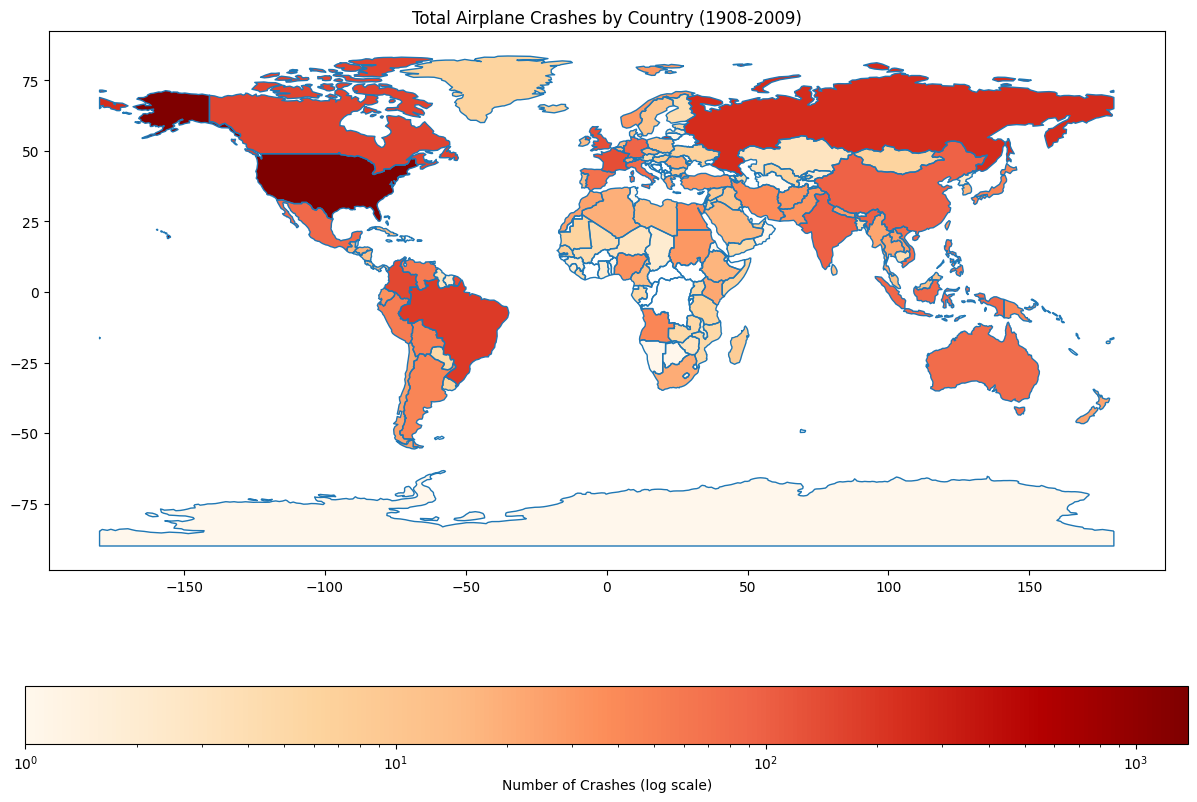

In [419]:
# this code has been generated by chatgpt 
# but later improved by myself to improve the distribution of color between countries to make it more balanced

# define "land" from final merged dataframe "land" 
# added columns "year" and "countr" 
land = airplane[["year","country"]]

# dropping all missing values for countries
land.dropna(thresh = 2, inplace = True)

# rename former countries to its current name (example: soviet union --> russia)
# and other countries are renamed according to geopandas settings (example: united states --> united states of america)
land["country"] = land['country'].replace({
    'United States': 'United States of America',
    'Soviet Union': 'Russia',
    'West Germany': 'Germany',
    'East Germany': 'Germany',
    'South Vietnam': 'Vietnam',
    'Myanmar (Burma)': 'Myanmar',
    'Rhodesia': 'Zimbabwe',
    'England': 'United Kingdom',
    'Scotland': 'United Kingdom',
    'Northern Ireland': 'United Kingdom',
    'Wales': 'United Kingdom',
    'Czechoslovakia': 'Czechia',
    'French Equatorial Africa': 'Central African Republic',
    'Hong Kong': 'China'
})

# using groupby method to create a new dataframe called crashes_per_country_year
# every country is listed by year and number of crashes by year
crashes_per_country_year = land.groupby(['country', 'year']).size().reset_index(name='count')

# totalling all crashes per country (regardless of year)
total_crashes_per_country = crashes_per_country_year.groupby('country')['count'].sum().reset_index()

# library called "geopandas" is used to create the world map
import geopandas as gpd

# load the world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# merging the crash data with the world map
world = world.set_index('name').join(total_crashes_per_country.set_index('country'))

# replacing any country count with NaN values with the value of 0
world['count'] = world['count'].fillna(0) 

# other libraries are added
import numpy as np
import matplotlib.colors as mcolors     # this library is very important for color distribution to make it more balanced
import matplotlib.pyplot as plt

# using a logarithmic scale for the color mapping
fig, ax = plt.subplots(1, 1, figsize=(15, 10))   # adjusting the size
world.boundary.plot(ax=ax, linewidth=1)
norm = mcolors.LogNorm(vmin=world['count'].min() + 1, vmax=world['count'].max())  # log scale
world.plot(column='count', ax=ax, legend=True, cmap='OrRd', norm=norm,
           legend_kwds={'label': "Number of Crashes (log scale)", 'orientation': "horizontal"})
ax.set_title('Total Airplane Crashes by Country (1908-2009)')     # title
plt.show()

# United States Map

/tmp/ipykernel_33/3433734452.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_state.dropna(thresh = 2, inplace = True)


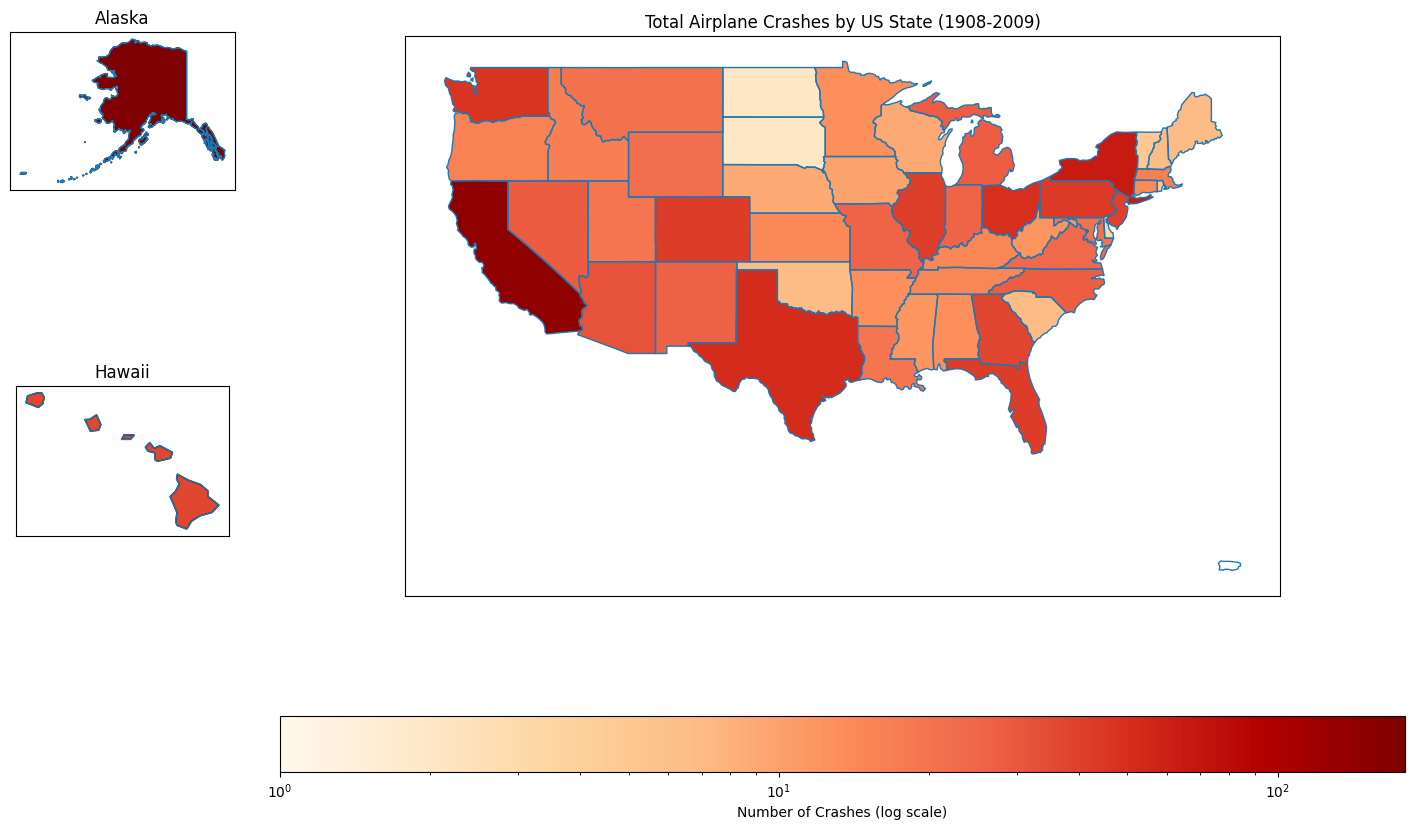

In [420]:
# this code has been generated by chatgpt 
# but later improved by myself to improve the distribution of color between countries to make it more balanced
# and fix the plot x and y axis of both alaska and hawaii

# define "us_state"
us_state = airplane[["year","us_state"]]

# dropping all missing values for countries
us_state.dropna(thresh = 2, inplace = True)

# using groupby method to create a new dataframe called crashes_per_state_year
# every state is listed by year and number of crashes by year
crashes_per_state_year = us_state.groupby(['us_state', 'year']).size().reset_index(name='count')

# totalling all crashes per state (regardless of year)
total_crashes_per_state = crashes_per_state_year.groupby('us_state')['count'].sum().reset_index()

# essential map libraries 
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# load the us states data from a GeoJSON file
# this image has been loaded because geopandas does not offer us state map
us_states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# merge the crash data with the us states GeoDataFrame
us_states = us_states.set_index('name').join(total_crashes_per_state.set_index('us_state'))

# replace any nan with 0 for states with no crashes
us_states['count'] = us_states['count'].fillna(0)  

# plot the us states map with crash counts
fig = plt.figure(figsize=(15, 10))    # figure size

# add mainland as the main plot and it is the largest
mainland_ax = fig.add_axes([0.2, 0.1, 0.75, 0.8])  # [left, bottom, width, height]
mainland = us_states[~us_states.index.isin(['Alaska', 'Hawaii'])]   # removing both alaska and hawaii and seperating them from mainland
mainland.boundary.plot(ax=mainland_ax, linewidth=1)
norm = mcolors.LogNorm(vmin=1, vmax=us_states['count'].max() + 1)  # log scale for color normalization
mainland.plot(column='count', ax=mainland_ax, legend=True, cmap='OrRd', norm=norm,
              legend_kwds={'label': "Number of Crashes (log scale)", 'orientation': "horizontal"})
mainland_ax.set_title('Total Airplane Crashes by US State (1908-2009)')
mainland_ax.set_xticks([])
mainland_ax.set_yticks([])

# adding alaska as an inset at the top left
alaska_ax = fig.add_axes([0.02, 0.7, 0.15, 0.25])  # [left, bottom, width, height]
alaska = us_states.loc[['Alaska']]
alaska.boundary.plot(ax=alaska_ax, linewidth=1)
alaska.plot(column='count', ax=alaska_ax, cmap='OrRd', edgecolor='black', norm=norm)
alaska_ax.set_title('Alaska')
alaska_ax.set_xticks([])
alaska_ax.set_yticks([])

# adding Hawaii as an inset in the middle left
hawaii_ax = fig.add_axes([0.02, 0.4, 0.15, 0.15])  # [left, bottom, width, height]
hawaii = us_states.loc[['Hawaii']]
hawaii.boundary.plot(ax=hawaii_ax, linewidth=1)
hawaii.plot(column='count', ax=hawaii_ax, cmap='OrRd', edgecolor='black', norm=norm)
hawaii_ax.set_title('Hawaii')
hawaii_ax.set_xticks([])
hawaii_ax.set_yticks([])

plt.show()

# Ocean Map

/tmp/ipykernel_33/3969391175.py:45: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


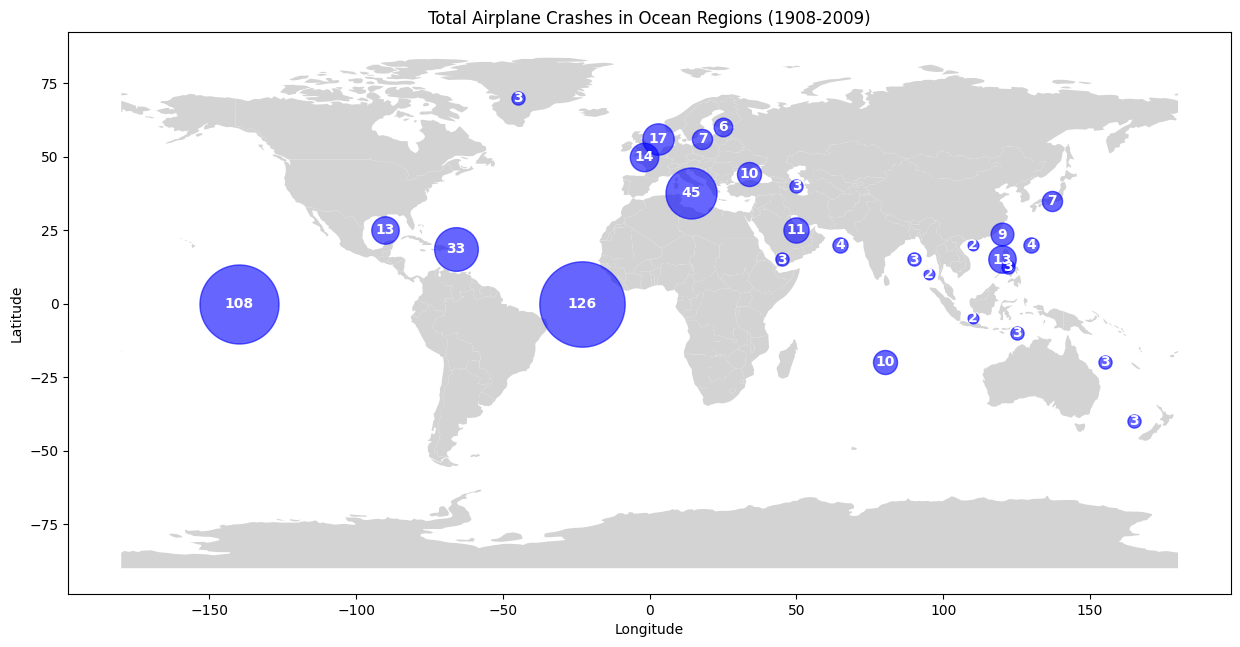

In [421]:
# please note that the initial example code has been initiated by chatgpt 
# but later improvements and implementation of the result has been done by myself and through research (aka data cleaning)
# and chatgpt had also helped in avoiding overlapping of results

# import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# these line of code were provided by chatgpt with ocean names like the atlantic and pacific added
# but later oceans, seas, gulf, and channels was added by myself
# all data was gathered under content: "sub-terrain for water"
data = {
    'water_terrain': ['Atlantic Ocean', 'North Sea', 'Mediterranean Sea', 'Pacific Ocean', 'Caribbean Sea',
                      'English Channel', 'Gulf of Mexico', 'South China Sea', 'Persian Gulf',
                      'Indian Ocean', 'Black Sea', 'Taiwan Strait', 'Baltic Sea', 'Sea of Japan', 'Gulf of Finland',
                      'Philippine Sea', 'Arabian Sea', 'Tasman Sea', 'Arctic Ocean', 'Sibuyan Sea',
                      'Caspian Sea', 'Timor Sea', 'Coral Sea', 'Bay of Bengal', 'Gulf of Aden', 'Java Sea', 'Gulf of Tonkin',
                      'Andaman Sea'],
    'latitude': [0.0, 56.0, 37.5, 0.0, 18.5,
                 50.0, 25.0, 15.0, 25.0,
                 -20.0, 44.0, 23.5, 56.0, 35.0, 60.0,
                 20.0, 20.0, -40.0, 70.0, 12.5,
                 40.0, -10.0, -20.0, 15.0, 15.0, -5.0, 20.0,
                 10.0],
    'longitude': [-23.0, 3.0, 14.0, -140.0, -66.0,
                  -2.0, -90.0, 120.0, 50.0,
                  80.0, 34.0, 120.0, 18.0, 137.0, 25.0,
                  130.0, 65.0, 165.0, -45.0, 122.0,
                  50.0, 125.0, 155.0, 90.0, 45.0, 110.0, 110.0,
                  95.0],
    'crash_count': [126, 17, 45, 108, 33, 14, 13, 13, 11, 10, 10, 9, 7, 7, 6,
                    4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2]
}

# convert to DataFrame
ocean = pd.DataFrame(data)

# convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(ocean['longitude'], ocean['latitude'])]
geo_df = gpd.GeoDataFrame(ocean, geometry=geometry)

# load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# plot the map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')

# plot the oceanic airplane crashes as dots
for idx, row in geo_df.iterrows():
    plt.scatter(row['longitude'], row['latitude'], s=row['crash_count']*30, color='blue', alpha=0.6)
    # slight shift the label positions to avoid overlap
    text_offset = 0.05
    plt.text(row['longitude'] + text_offset, row['latitude'] + text_offset, str(row['crash_count']),
             color='white', ha='center', va='center', fontsize=10, weight='bold')

# set titles and labels
plt.title('Total Airplane Crashes in Ocean Regions (1908-2009)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show the plot
plt.show()

# Airplane Crash Accidents by Terrain

<Axes: title={'center': 'Airplane Crash Accidents by Terrain'}, ylabel='count'>

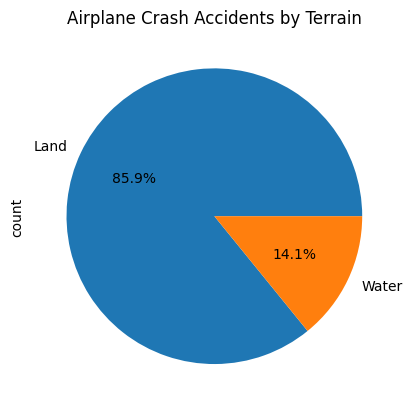

In [422]:
# Pie chart to view airplane crash accidents by terrain
airplane['terrain'].value_counts().plot(kind='pie', title='Airplane Crash Accidents by Terrain', autopct='%1.1f%%')

# Airplane Crash Accidents by Year

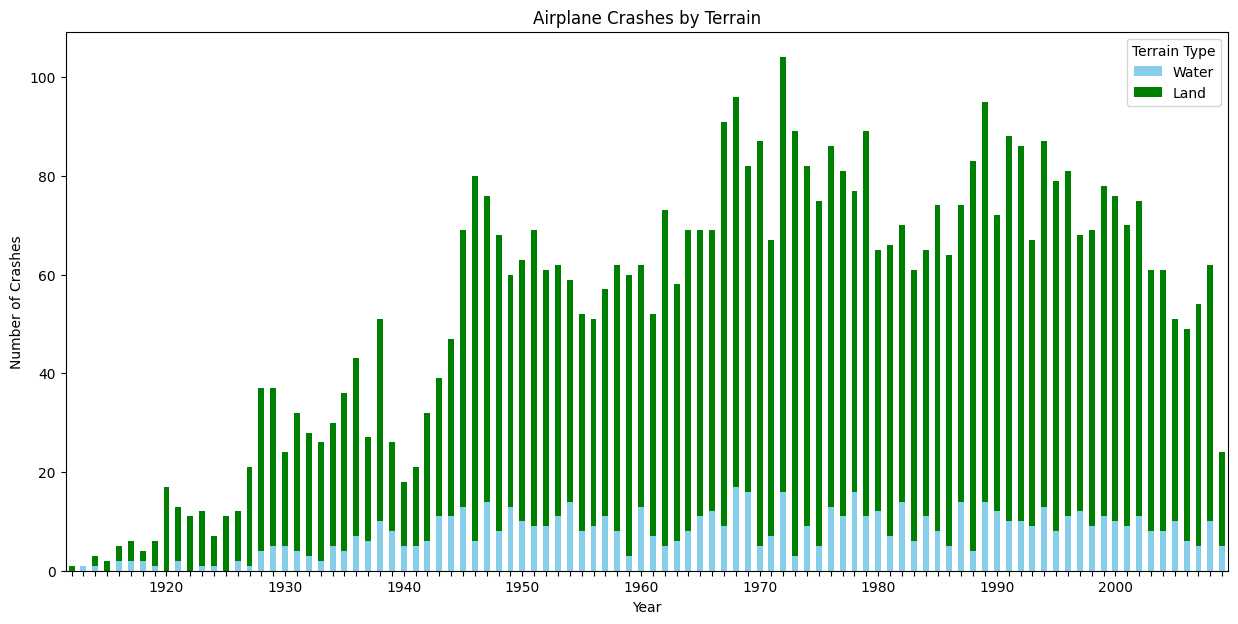

In [423]:
# this block of code was created by chatgpt using library matplotlib because i wanted to use both values "years" and "terrain"

# group by year and terrain type, then count the occurrences (this was done before learning the groupby method)
terrain_type_counts = airplane.groupby(["year", "terrain"]).size().unstack(fill_value=0)

# reordering the column by terrain type
terrain_type_counts = terrain_type_counts[["Water","Land"]]

# get decade labels function
# this function was created by chatgpt to be able to list the years by decade only
def get_decade_labels(years):
    labels = []
    for year in years:
        if year % 10 == 0:
            labels.append(str(year))
        else:
            labels.append("")
    return labels

# creating the decade labels on the x-axis
decade_labels = get_decade_labels(terrain_type_counts.index)

# type = bar, also figure size and color is selected
terrain_type_counts.plot(kind="bar", stacked=True, figsize=(15, 7), color=["skyblue", "green"])

# plot title
plt.title("Airplane Crashes by Terrain")

# plot title for the x-axis
plt.xlabel("Year")

# plot title for the y-axis
plt.ylabel("Number of Crashes")

# the function has been applied under labels, also rotation can be modified
plt.xticks(ticks=range(len(terrain_type_counts)), labels=decade_labels, rotation=0)

# legend title
plt.legend(title="Terrain Type")

# plotting the bar graph
plt.show()

# Airplane Crash Accidents by Land Terrain

<Axes: title={'center': 'Airplane Crash Accidents by Land Terrain'}, xlabel='Land Terrain', ylabel='Number of Accidents'>

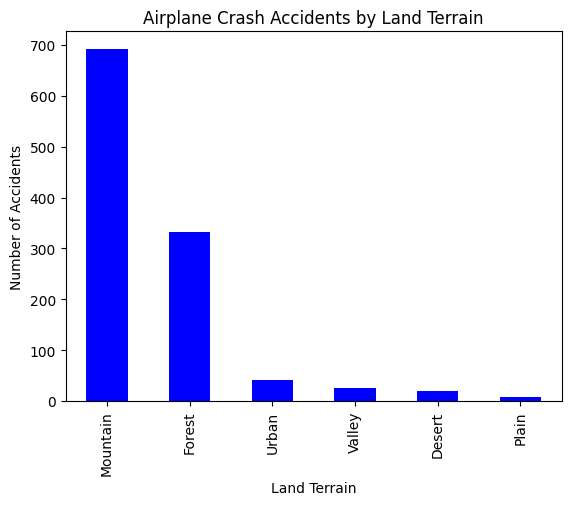

In [424]:
airplane["land_sub_terrain"].value_counts().plot(kind='bar',title="Airplane Crash Accidents by Land Terrain", xlabel="Land Terrain", ylabel="Number of Accidents", color='blue')


# Airplane Crash Accidents by Water Terrain

<Axes: title={'center': 'Airplane Crash Accidents by Water Terrain'}, xlabel='Water Terrain', ylabel='Number of Accidents'>

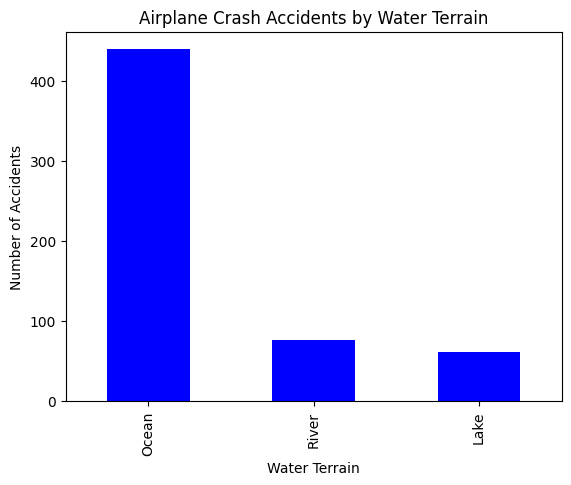

In [425]:
airplane["water_sub_terrain"].value_counts().plot(kind='bar',title="Airplane Crash Accidents by Water Terrain", xlabel="Water Terrain", ylabel="Number of Accidents", color='blue')


# Factors Contributing to Mountain Accidents

<Axes: title={'center': 'Factors Contributing to Mountain Accidents'}, xlabel='Cause', ylabel='Number of Accidents'>

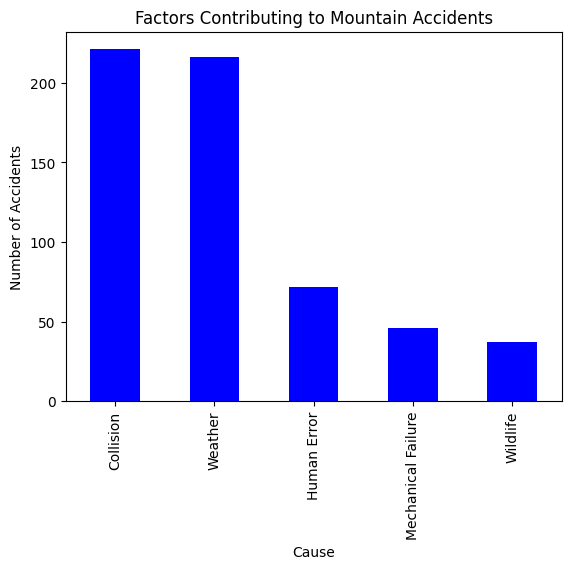

In [426]:
# define mountain
mountain = airplane[["id","year","land_sub_terrain","cause"]]
mountain = mountain.query("land_sub_terrain == 'Mountain'")

# bar graph
mountain["cause"].value_counts().head(5).plot(kind='bar',title="Factors Contributing to Mountain Accidents", xlabel="Cause", ylabel="Number of Accidents", color='blue')

# Aircraft Manufacturers in Mountain Crashes

<Axes: title={'center': 'Aircraft Manufacturers Involved in Mountain Crashes'}, xlabel='Number of Accidents', ylabel='Manufacturers'>

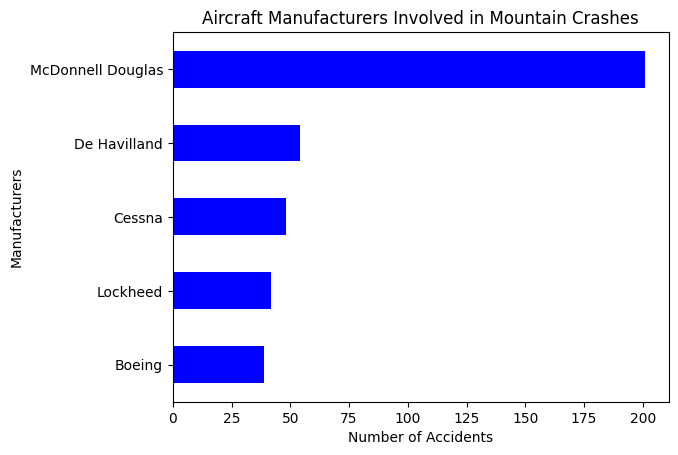

In [427]:
# define mountain
mountain = airplane[["id","year","land_sub_terrain","manufacturer"]]
mountain = mountain.query("land_sub_terrain == 'Mountain'")

# horizonal bar graph
mountain["manufacturer"].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',title="Aircraft Manufacturers Involved in Mountain Crashes", xlabel="Number of Accidents", ylabel="Manufacturers", color='blue')

# Airline Involvement in Mountain Crashes

<Axes: title={'center': 'Airline Involvement in Mountain Crashes'}, xlabel='Number of Accidents', ylabel='Airline Name'>

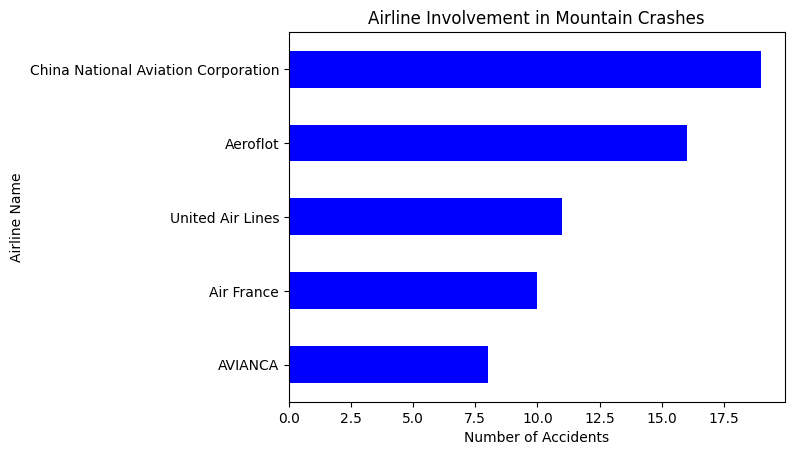

In [428]:
# define mountain
mountain = airplane.query("land_sub_terrain == 'Mountain'")[["year", "airline_name"]]

# horizonal bar graph
mountain["airline_name"].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',title="Airline Involvement in Mountain Crashes", xlabel="Number of Accidents", ylabel="Airline Name", color='blue')

# Distribution of Mountain Crashes by Aircraft Type

<Axes: title={'center': 'Distribution of Mountain Crashes by Aircraft Type'}, ylabel='count'>

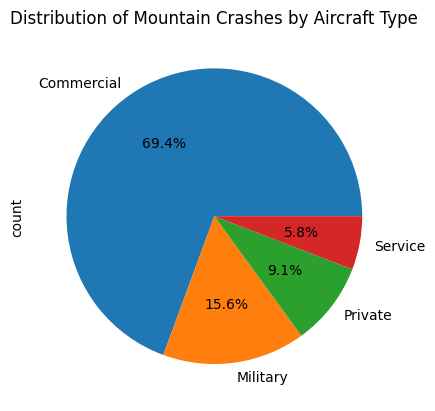

In [429]:
# define mountain
mountain = airplane.query("land_sub_terrain == 'Mountain'")[["year", "aircraft_category"]]

# Pie chart to view airplane crash accidents by terrain
airplane['aircraft_category'].value_counts().plot(kind='pie', title='Distribution of Mountain Crashes by Aircraft Type', autopct='%1.1f%%')

# Factors Contributing to Ocean Accidents

<Axes: title={'center': 'Factors Contributing to Ocean Accidents'}, xlabel='Cause', ylabel='Number of Accidents'>

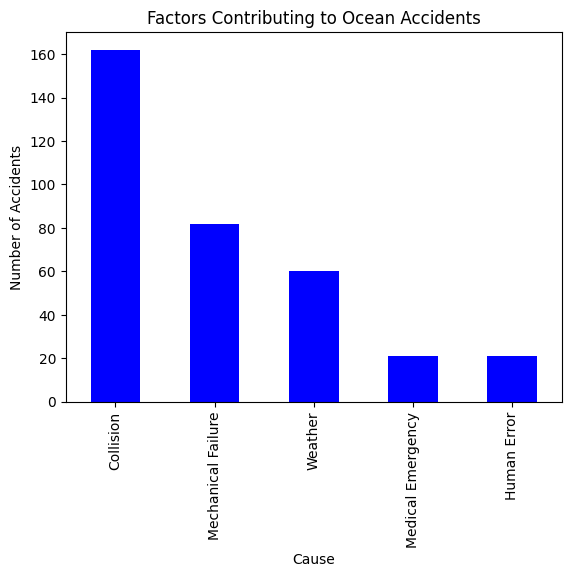

In [430]:
# define ocean
ocean = airplane.query("water_sub_terrain == 'Ocean'")[["year", "cause"]]

# bar graph
ocean["cause"].value_counts().head(5).plot(kind='bar',title="Factors Contributing to Ocean Accidents", xlabel="Cause", ylabel="Number of Accidents", color='blue')

# Aircraft Manufacturers in Ocean Crashes

<Axes: title={'center': 'Aircraft Manufacturers Involved in Ocean Crashes'}, xlabel='Number of Accidents', ylabel='Manufacturers'>

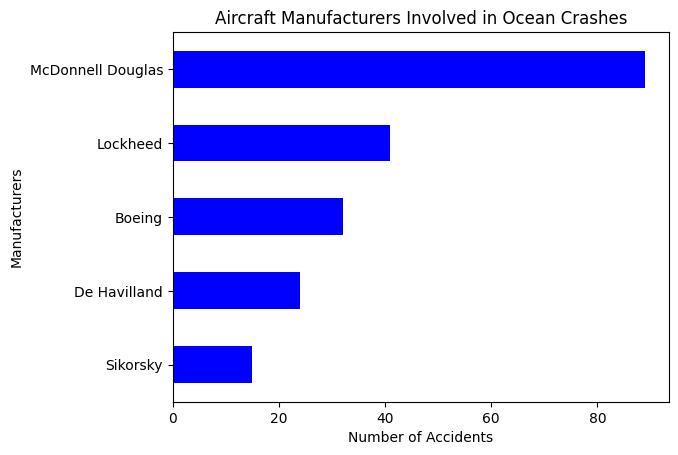

In [431]:
# define ocean
ocean = airplane.query("water_sub_terrain == 'Ocean'")[["year", "manufacturer"]]

# horizonal bar graph
ocean["manufacturer"].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',title="Aircraft Manufacturers Involved in Ocean Crashes", xlabel="Number of Accidents", ylabel="Manufacturers", color='blue')

# Airline Involvement in Ocean Crashes

<Axes: title={'center': 'Airline Involvement in Ocean Crashes'}, xlabel='Number of Accidents', ylabel='Airline Name'>

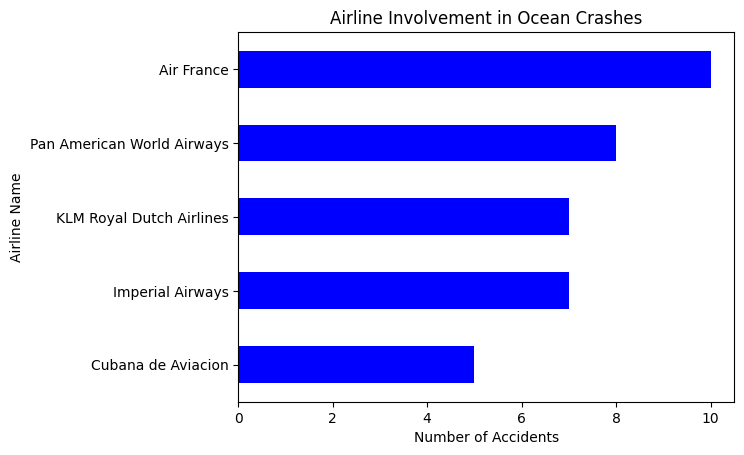

In [432]:
# define ocean
ocean = airplane.query("water_sub_terrain == 'Ocean'")[["year", "airline_name"]]

# horizonal bar graph
ocean["airline_name"].value_counts().head(5).sort_values(ascending=True).plot(kind='barh',title="Airline Involvement in Ocean Crashes", xlabel="Number of Accidents", ylabel="Airline Name", color='blue')

# Distribution of Ocean Crashes by Aircraft Type

<Axes: title={'center': 'Distribution of Ocean Crashes by Aircraft Type'}, ylabel='count'>

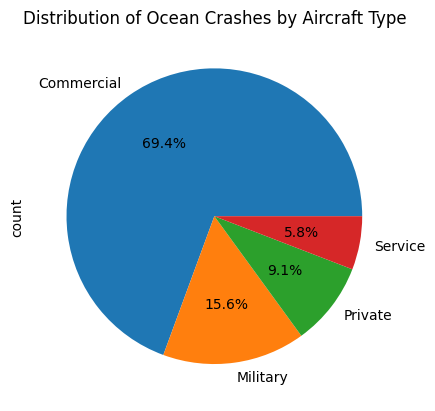

In [433]:
# define ocean
ocean = airplane.query("water_sub_terrain == 'Ocean'")[["year", "aircraft_category"]]

# Pie chart to view airplane crash accidents by terrain
airplane['aircraft_category'].value_counts().plot(kind='pie', title='Distribution of Ocean Crashes by Aircraft Type', autopct='%1.1f%%')

# Survival Rate by Terrain

In [434]:
commercial = airplane.query("aircraft_category == 'Commercial'")

In [435]:
# three land terrains
urban = commercial.query("land_sub_terrain == 'Urban'")
forest = commercial.query("land_sub_terrain == 'Forest'")
mountain = commercial.query("land_sub_terrain == 'Mountain'")

# two water terrains
river = commercial.query("water_sub_terrain == 'River'")
ocean = commercial.query("water_sub_terrain == 'Ocean'")

# average aboard for all commercial flights
average_aboard = commercial['aboard'].mean()
print(f"Average Aboard: {average_aboard}")

Average Aboard: 31.662630709961476


In [436]:
# urban
total_aboard = urban['aboard'].sum()
total_fatalities = urban['fatalities'].sum()

fatalities_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
aboard_impact_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
survival_rate = 100 - fatalities_rate

print(f"Fatalities Rate: {fatalities_rate}")
print(f"Aboard Impact Rate: {aboard_impact_rate}")
print(f"Survival Rate: {survival_rate}")

Fatalities Rate: 47.15447154471545
Aboard Impact Rate: 47.15447154471545
Survival Rate: 52.84552845528455


In [437]:
# forest
total_aboard = forest['aboard'].sum()
total_fatalities = forest['fatalities'].sum()

fatalities_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
aboard_impact_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
survival_rate = 100 - fatalities_rate

print(f"Fatalities Rate: {fatalities_rate}")
print(f"Aboard Impact Rate: {aboard_impact_rate}")
print(f"Survival Rate: {survival_rate}")

Fatalities Rate: 74.56369982547993
Aboard Impact Rate: 74.56369982547993
Survival Rate: 25.43630017452007


In [438]:
# mountain
total_aboard = mountain['aboard'].sum()
total_fatalities = mountain['fatalities'].sum()

fatalities_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
aboard_impact_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
survival_rate = 100 - fatalities_rate

print(f"Fatalities Rate: {fatalities_rate}")
print(f"Aboard Impact Rate: {aboard_impact_rate}")
print(f"Survival Rate: {survival_rate}")

Fatalities Rate: 93.83098815486127
Aboard Impact Rate: 93.83098815486127
Survival Rate: 6.169011845138726


In [439]:
# river
total_aboard = river['aboard'].sum()
total_fatalities = river['fatalities'].sum()

fatalities_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
aboard_impact_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
survival_rate = 100 - fatalities_rate

print(f"Fatalities Rate: {fatalities_rate}")
print(f"Aboard Impact Rate: {aboard_impact_rate}")
print(f"Survival Rate: {survival_rate}")

Fatalities Rate: 66.548463356974
Aboard Impact Rate: 66.548463356974
Survival Rate: 33.451536643026


In [440]:
# ocean
total_aboard = ocean['aboard'].sum()
total_fatalities = ocean['fatalities'].sum()

fatalities_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
aboard_impact_rate = (total_fatalities / total_aboard) * 100 if total_aboard > 0 else 0
survival_rate = 100 - fatalities_rate

print(f"Fatalities Rate: {fatalities_rate}")
print(f"Aboard Impact Rate: {aboard_impact_rate}")
print(f"Survival Rate: {survival_rate}")

Fatalities Rate: 78.18196681108476
Aboard Impact Rate: 78.18196681108476
Survival Rate: 21.818033188915237
